In [1]:
import requests

In [2]:
key ='yOU3QMP9oKmbKdQlXMWG4ad0pFXlvqLn'

params = {
    'apikey' : key,
    'q': '50.070614822825284,14.38139328358034',
    'language' : 'ru-ru'
}

response = requests.get('http://dataservice.accuweather.com/locations/v1/cities/geoposition/search/', params=params)
if response.status_code == 200:
    response = response.json()
else:
    print('Failed to get prediction:', response.status_code)

In [3]:
response

{'Version': 1,
 'Key': '125528',
 'Type': 'City',
 'Rank': 65,
 'LocalizedName': '',
 'EnglishName': 'Kosire',
 'PrimaryPostalCode': '',
 'Region': {'ID': 'EUR', 'LocalizedName': 'Европа', 'EnglishName': 'Europe'},
 'Country': {'ID': 'CZ',
  'LocalizedName': 'Чешская Республика',
  'EnglishName': 'Czechia'},
 'AdministrativeArea': {'ID': '10',
  'LocalizedName': 'Прага',
  'EnglishName': 'Prague',
  'Level': 1,
  'LocalizedType': 'Столица',
  'EnglishType': 'Capital City',
  'CountryID': 'CZ'},
 'TimeZone': {'Code': 'CET',
  'Name': 'Europe/Prague',
  'GmtOffset': 1.0,
  'IsDaylightSaving': False,
  'NextOffsetChange': '2024-03-31T01:00:00Z'},
 'GeoPosition': {'Latitude': 50.063,
  'Longitude': 14.365,
  'Elevation': {'Metric': {'Value': 291.0, 'Unit': 'm', 'UnitType': 5},
   'Imperial': {'Value': 956.0, 'Unit': 'ft', 'UnitType': 0}}},
 'IsAlias': False,
 'ParentCity': {'Key': '125594',
  'LocalizedName': 'Прага',
  'EnglishName': 'Prague'},
 'SupplementalAdminAreas': [{'Level': 2,
   

In [4]:
location_key = response['Key']

In [5]:
location_key

'125528'

In [6]:
params = {
    'apikey' : key,
    'language' : 'ru-ru',
    'details': 'true',
    'metrics': 'true'
}

response = requests.get('http://dataservice.accuweather.com/forecasts/v1/hourly/12hour/' + location_key, params=params)
if response.status_code == 200:
    response = response.json()
else:
    print('Failed to get prediction:', response.status_code)



In [7]:
response

[{'DateTime': '2023-11-29T13:00:00+01:00',
  'EpochDateTime': 1701259200,
  'WeatherIcon': 4,
  'IconPhrase': 'Переменная облачность',
  'HasPrecipitation': False,
  'IsDaylight': True,
  'Temperature': {'Value': 31.0, 'Unit': 'F', 'UnitType': 18},
  'RealFeelTemperature': {'Value': 20.0,
   'Unit': 'F',
   'UnitType': 18,
   'Phrase': 'Очень холодно'},
  'RealFeelTemperatureShade': {'Value': 20.0,
   'Unit': 'F',
   'UnitType': 18,
   'Phrase': 'Очень холодно'},
  'WetBulbTemperature': {'Value': 29.0, 'Unit': 'F', 'UnitType': 18},
  'DewPoint': {'Value': 26.0, 'Unit': 'F', 'UnitType': 18},
  'Wind': {'Speed': {'Value': 13.8, 'Unit': 'mi/h', 'UnitType': 9},
   'Direction': {'Degrees': 210, 'Localized': 'ЮЮЗ', 'English': 'SSW'}},
  'WindGust': {'Speed': {'Value': 19.6, 'Unit': 'mi/h', 'UnitType': 9}},
  'RelativeHumidity': 81,
  'IndoorRelativeHumidity': 35,
  'Visibility': {'Value': 10.0, 'Unit': 'mi', 'UnitType': 2},
  'Ceiling': {'Value': 22300.0, 'Unit': 'ft', 'UnitType': 0},
  'UVI

In [20]:
temp = []
precipitation = []
wind = []
humid = []
uvindex = []
timestamps = []

for i in range(len(response)):
    uvindex.append(response[i]['UVIndex'])
    temp.append((response[i]['Temperature']['Value'] - 32) * 5/9)
    precipitation.append(response[i]['PrecipitationProbability'])
    wind.append(response[i]['Wind']['Speed']['Value'] * 1.609)
    humid.append(response[i]['RelativeHumidity'])
    timestamps.append(response[i]['DateTime'])

res = [temp, precipitation]

In [14]:
icon_mapping = {
        '1': '01d',
        '2': '02d',
        '3': '02d',
        '4': '02d',
        '5': '02d',
        '6': '03d',
        '7': '03d',
        '8': '04d',
        '11': '50d',
        '12': '09d',
        '13': '10d',
        '14': '10d',
        '15': '11d',
        '16': '11d',
        '17': '11d',
        '18': '08d',
        '19': '13d',
        '20': '13d',
        '21': '13d',
        '22': '13d',
        '23': '13d',
        '24': '13d',
        '25': '13d',
        '26': '09d',
        '29': '13d',
        '30': '01d',
        '31': '13n',
        '32': '04d',
        '33': '01n',
        '34': '02n',
        '35': '02n',
        '36': '02n',
        '37': '02n',
        '38': '03n',
        '39': '10n',
        '40': '09n',
        '41': '11n',
        '42': '11n',
        '43': '13n',
        '44': '13n'
    }

In [19]:
def weather_icon(weather_icon_id):
    icon_id = icon_mapping[str(weather_icon_id)]
    response = requests.get('https://openweathermap.org/img/wn/{}@2x.png'.format(icon_id))
    if response.status_code == 200:
        response = response
    else:
        print('Failed to get icon:', response.status_code)
    return response
    

In [26]:
res = weather_icon(44)

In [28]:
from IPython.display import Image, display

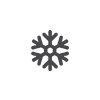

In [29]:
display(Image(res.content))

In [31]:
print(Image(res.content))

<IPython.core.display.Image object>


In [4]:
import requests

location_key = '125528'
apikey = 'yOU3QMP9oKmbKdQlXMWG4ad0pFXlvqLn'

In [12]:
params = {
        'q': 'P',
        'apikey': apikey
    }

response = requests.get('http://dataservice.accuweather.com/locations/v1/cities/autocomplete',
                        params=params)
if response.status_code == 200:
    response = response.json()
else:
    print('Failed to get prediction:', response.status_code)

In [16]:
response[0]['LocalizedName']

'Pyongyang'